## Install Dependencies

In [1]:
!pip install scikit-learn matplotlib seaborn pandas numpy

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.3.0
altair                        4.2.0
anaconda-client               1.11.0
anaconda-navigator            2.4.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arrow                         1.2.2
astral                        3.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcal

## Import Dependencies

In [3]:
# libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Prepare Data

In [4]:
# Loading training data
path_data = os.path.join('data')
train = pd.read_csv(os.path.join(path_data, 'train.csv'))
test = pd.read_csv(os.path.join(path_data, 'test.csv'))
submission = pd.read_csv(os.path.join(path_data, 'submission.csv'))

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [8]:
train.shape, test.shape, submission.shape

((891, 12), (418, 11), (418, 2))

In [9]:
merged_test = pd.merge(test, submission, on='PassengerId', how='outer')

In [10]:
merged_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [11]:
merged_test.shape

(418, 12)

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
merged_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.375598
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.484857
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


The dataset we are working with contains 891 examples and 12 features. However, the ratio of features to examples is quite high, which can lead to overfitting. To mitigate this, we will proceed to eliminate any features that are not deemed essential for our analysis in order to reduce the number of features and increase the chances of a more accurate mode.

For instance, the "PassengerId" feature simply serves as an identification number for each passenger in the data and does not provide any useful information for analysis. Therefore, this feature can be removed.

In [14]:
# Null Data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The "Cabin" feature has 687 missing values, which constitutes a large portion of the total data. As a result, it would be more appropriate to remove this feature entirely instead of trying to impute the missing data.

In [15]:
# dropping Unnecessary Features
train.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)
merged_test.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

In [16]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
merged_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


## Data Visualisation and Mining

#### Survived

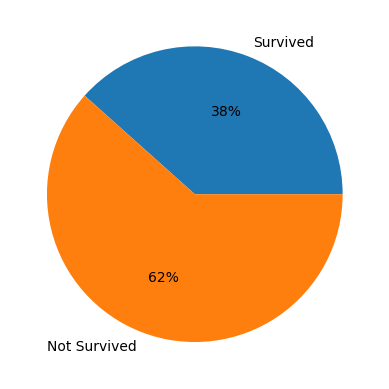

In [18]:
plt.pie(x=[len(train[train['Survived'] == 1]), len(train[train['Survived'] == 0])],
       labels=['Survived', 'Not Survived'], autopct='%.0f%%')

plt.show()

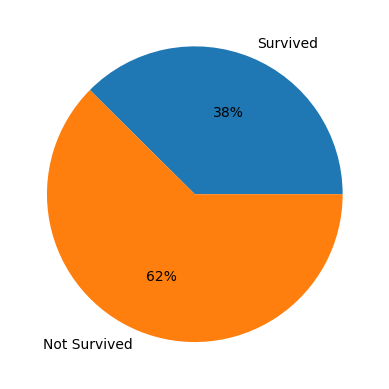

In [19]:
plt.pie(x=[len(merged_test[merged_test['Survived'] == 1]), len(merged_test[merged_test['Survived'] == 0])],
       labels=['Survived', 'Not Survived'], autopct='%.0f%%')

plt.show()

The pie chart indicates that only 38% of the passengers in the given data survived.

### Name

In [20]:
train[['Name', 'Survived']].head(10)

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


Upon examination of the data, we can see that each "Name" has a specific title (such as "Mr", "Mrs", "Miss", etc.) and this feature can be further analyzed for useful insights.

In [21]:
# Creating a new feature by extracting the title from the "Name" column.
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
merged_test['Title'] = merged_test['Name'].str.extract('([A-Za-z]+)\.')

In [22]:
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss


In [23]:
merged_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,Mr


#### For train data

In [24]:
pd.crosstab(train.Survived, train.Title, margins = True)

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Survived,,,,,,,,,,,,,,,,,,
0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0,549
1,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,342
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [25]:
# Replacing positional title with appropriate ones ('Master', 'Miss', 'Mr', 'Mrs', 'Other').
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                         inplace=True)

In [26]:
pd.crosstab(train.Survived, train.Title, margins = True)

Title,Master,Miss,Mr,Mrs,Other,All
Survived,,,,,,
0,17,55,443,26,8,549
1,23,131,86,101,1,342
All,40,186,529,127,9,891


#### For test data

In [27]:
pd.crosstab(merged_test.Survived, merged_test.Title, margins = True)

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev,All
Survived,,,,,,,,,,
0,1,0,1,5,10,234,8,0,2,261
1,1,1,0,16,68,6,64,1,0,157
All,2,1,1,21,78,240,72,1,2,418


In [28]:
# Replacing positional title with appropriate ones ('Master', 'Miss', 'Mr', 'Mrs', 'Other').
merged_test['Title'].replace(['Ms','Dr','Col','Rev','Dona'],
                         ['Miss','Mr','Other','Other','Mrs'],
                         inplace=True)

In [29]:
pd.crosstab(merged_test.Survived, merged_test.Title, margins = True)

Title,Master,Miss,Mr,Mrs,Other,All
Survived,,,,,,
0,5,10,235,8,3,261
1,16,69,6,65,1,157
All,21,79,241,73,4,418


#### Visualize train data

In [30]:
train.Title.unique().tolist()

['Mr', 'Mrs', 'Miss', 'Master', 'Other']

In [31]:
data_pie = [len(train[train['Title'] == 'Mr']), 
           len(train[train['Title'] == 'Mrs']),
           len(train[train['Title'] == 'Miss']),
           len(train[train['Title'] == 'Master']),
           len(train[train['Title'] == 'Other'])]

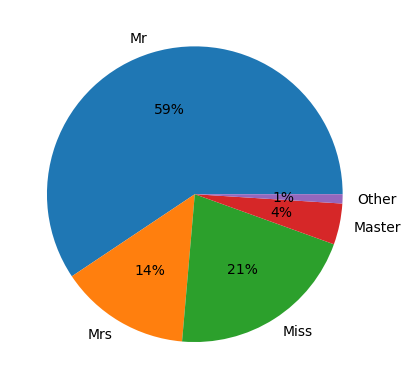

In [32]:
plt.pie(x= data_pie,
        labels =train.Title.unique().tolist(),
        autopct='%.0f%%')
plt.show()

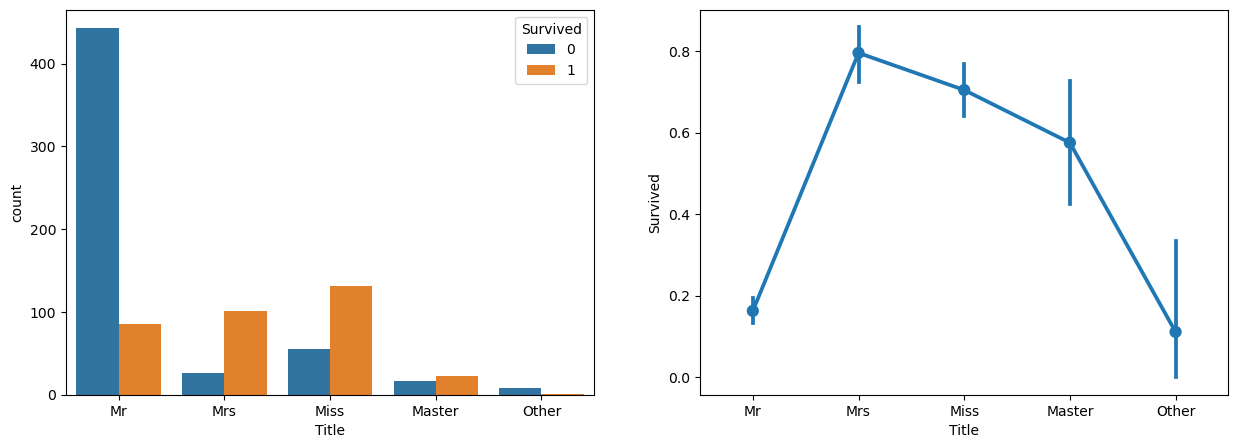

In [33]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.pointplot(x='Title', y='Survived', data=train, ax=ax[1])
sns.countplot(x='Title', hue='Survived', data=train, ax=ax[0])
plt.show()

#### Observation

The majority of passengers with the title "Mr." in their name had low survival rates, while those with "Mrs." and "Miss" had high survival rates. 

This suggests that sex and age were significant factors in determining survival on the ship.

### Age

In [34]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Based on the data presented, a significant number of passengers are adults within the age range of 20 to 40.

In [35]:
train['Age'].isnull().sum()

177

We have 177 Nan Values

#### Fixing Nan Values

In [36]:
# Getting Age mean wrt Initials data
age_values = train.groupby('Title')['Age'].mean().to_dict()
age_values

{'Master': 4.574166666666667,
 'Miss': 21.86,
 'Mr': 32.73960880195599,
 'Mrs': 35.981818181818184,
 'Other': 45.888888888888886}

In [37]:
for title, age in age_values.items():
    train.loc[(train.Age.isnull()) & (train['Title'] == title), 'Age'] = round(age)

In [38]:
# for merged test
age_values = merged_test.groupby('Title')['Age'].mean().to_dict()
age_values

{'Master': 7.406470588235294,
 'Miss': 21.77484375,
 'Mr': 32.11413043478261,
 'Mrs': 38.904761904761905,
 'Other': 42.75}

In [39]:
for title, age in age_values.items():
    merged_test.loc[(merged_test.Age.isnull()) & (merged_test['Title'] == title), 'Age'] = round(age)

#### Changing Continous Feature to Categorical

In [40]:
train['AgeGrp'] = pd.cut(train['Age'], bins=[0,10,20,30,45,80], labels=[1,2,3,4,5])

In [41]:
merged_test['AgeGrp'] = pd.cut(train['Age'], bins=[0,10,20,30,45,80], labels=[1,2,3,4,5])

AGE Labels
* 1 : 0 to 10 : Kids
* 2 : 11 to 20 : Teens
* 3 : 21 to 30 : Young Adults
* 4 : 31 to 45 : Middle Aged Adults
* 5 : 45+ : Elders

#### Visualize train data

<AxesSubplot:xlabel='Age', ylabel='Count'>

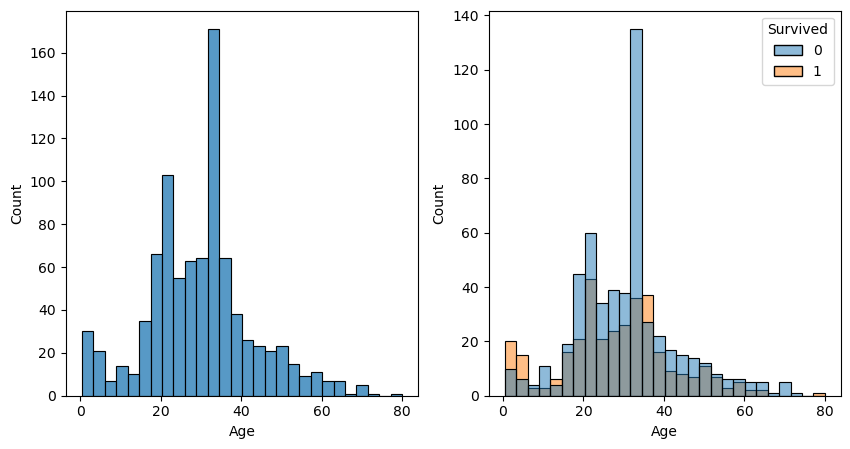

In [42]:
f,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x = 'Age', data=train, ax=ax[0])
sns.histplot(x = 'Age', hue='Survived', data=train, ax=ax[1])

In [43]:
pie_data = [len(train[train['AgeGrp'] == 1]),
           len(train[train['AgeGrp'] == 2]),
           len(train[train['AgeGrp'] == 3]),
           len(train[train['AgeGrp'] == 4]),
           len(train[train['AgeGrp'] == 5])]

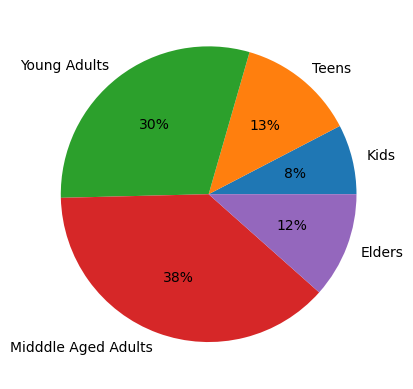

In [44]:
plt.pie(x= pie_data,
        labels =['Kids','Teens','Young Adults','Midddle Aged Adults','Elders'],
        autopct='%.0f%%')
plt.show()

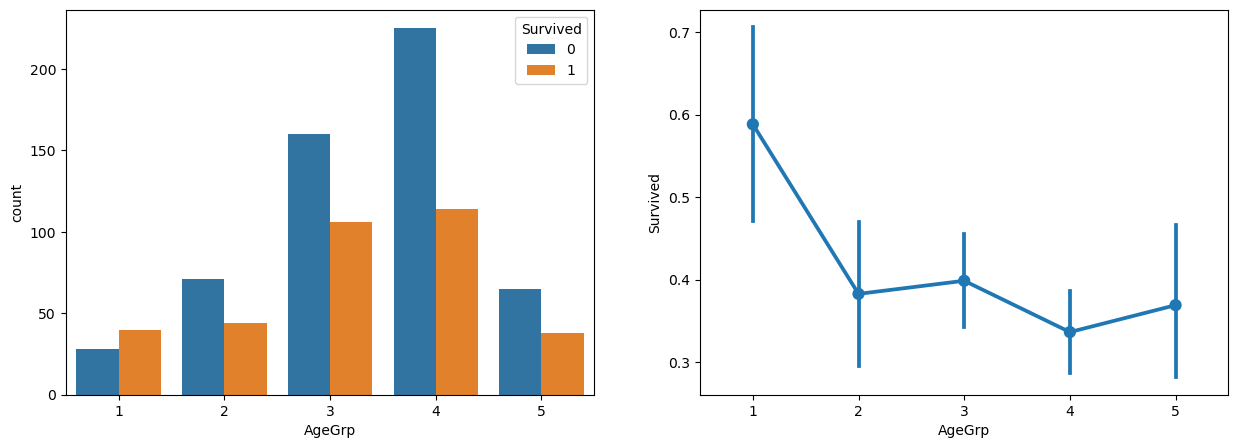

In [45]:
f,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='AgeGrp',hue= 'Survived', data=train,ax=ax[0])
sns.pointplot(x='AgeGrp', y='Survived', data=train, ax=ax[1])
plt.show()

#### Observation

The majority of people on the ship were middle-aged, with the majority of passengers being between the ages of 31 and 45.

The survival rate for children was found to be high, while the rate for middle-aged adults was the lowest.

### Passenger class: Pclass

#### Visualise train data

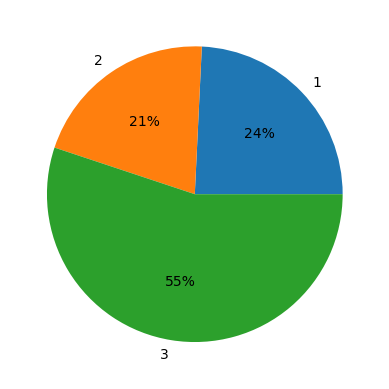

In [46]:
plt.pie(x= train.groupby('Pclass')['Survived'].count().tolist(),
        labels =[1,2,3],
        autopct='%.0f%%')
plt.show()

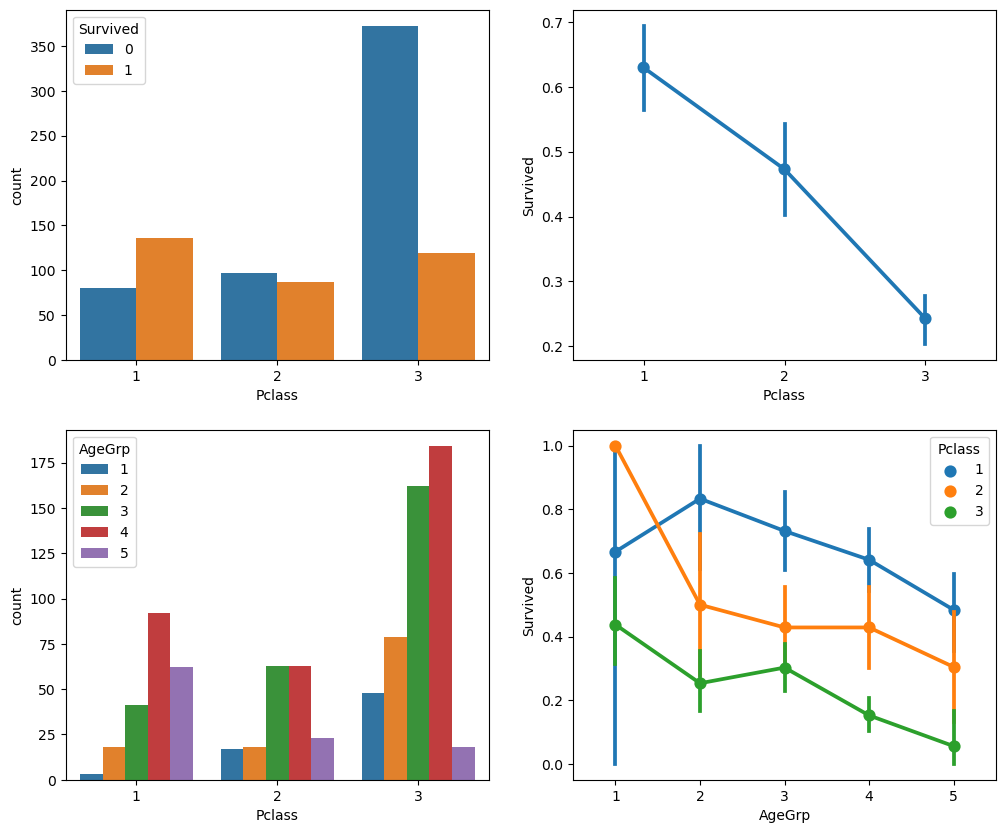

In [47]:
f,ax = plt.subplots(2,2,figsize=(12,10))
sns.countplot(x = 'Pclass', hue='Survived', data=train, ax=ax[0][0])
sns.pointplot(x = 'Pclass', y='Survived', data=train, ax=ax[0][1])
sns.countplot(x = 'Pclass', hue='AgeGrp', data=train, ax=ax[1][0])
sns.pointplot(x='AgeGrp', y='Survived', hue='Pclass', data=train, ax=ax[1][1])
plt.show()

#### Observation

Passengers in Class 3 have the lowest survival rate among all classes, with most of them being children. 

Class 1 passengers have a higher survival rate and are mostly older. 

This suggests that children were given priority in survival efforts. All children in Class 2 survived. 

Survival rate decreases as age and class increase.

### Sex

#### Visualize train data

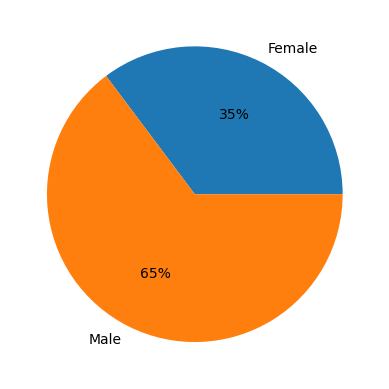

In [48]:
plt.pie(x= train.groupby('Sex')['Survived'].count().tolist(),
        labels =['Female', 'Male'],
        autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

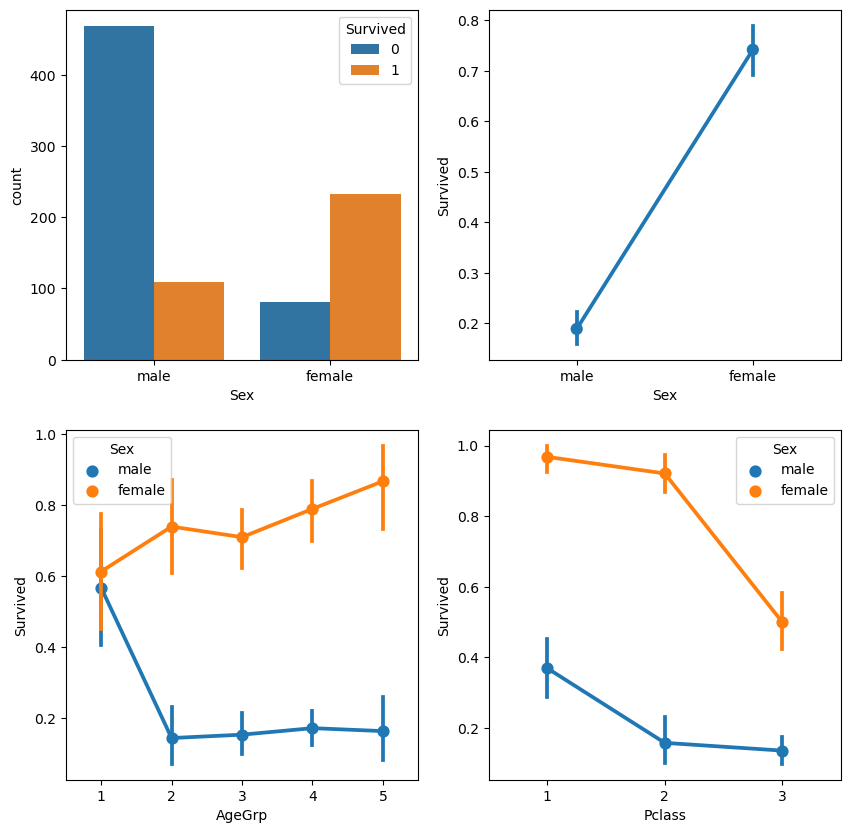

In [49]:
f, ax = plt.subplots(2,2, figsize=(10,10))
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[0][0])
sns.pointplot(x='Sex', y='Survived', data=train, ax=ax[0][1])
sns.pointplot(x='AgeGrp', y='Survived', hue='Sex', data=train, ax=ax[1][0])
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train, ax=ax[1][1])

#### Observation

Females have a much higher survival rate compared to males across all classes. 

The survival rate for females increases with age. 

Males in Class 1 have a relatively high survival rate compared to males in Class 3

### SibSp

#### Visualie train data

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

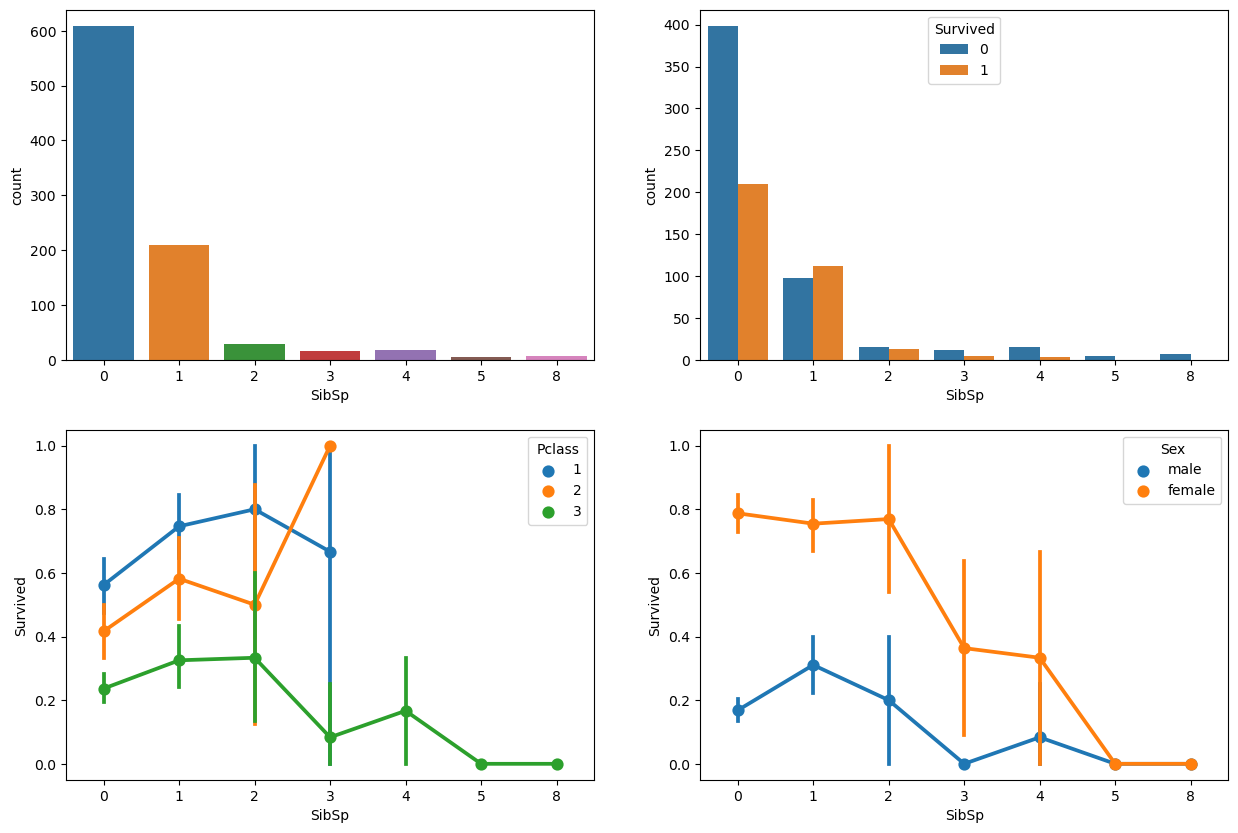

In [50]:
f,ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'SibSp',data=train, ax=ax[0][0])
sns.countplot(x = 'SibSp', hue='Survived', data=train, ax=ax[0][1])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Pclass', data=train, ax=ax[1][0])
sns.pointplot(x = 'SibSp',y= 'Survived', hue='Sex', data=train, ax=ax[1][1])

#### Observation

The number of passengers with more than one sibling decreases significantly. 

Males with no siblings have a low survival rate. 

Survival rate decreases as the number of siblings increases, with no passengers in classes 1 and 2 having more than three siblings.

### Family & Alone Features

In [51]:
merged_test['Family'] = merged_test['SibSp'] + merged_test['Parch']
merged_test['Alone'] = 0
for i in range(len(merged_test)):
    if merged_test.loc[i, 'Family'] == 0:
        merged_test.loc[i, 'Alone'] = 1

In [52]:
train['Family'] = train['SibSp'] + train['Parch']
train['Alone'] = 0
for i in range(len(train)):
    if train.loc[i, 'Family'] == 0:
        train.loc[i, 'Alone'] = 1

#### Visualize train data

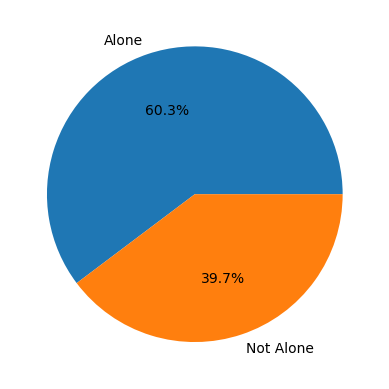

In [53]:
plt.pie(x= sorted(train.groupby('Alone')['Survived'].count().tolist(), reverse=True),
        autopct='%0.1f%%',
        labels = ['Alone', 'Not Alone'])
plt.show()

In [54]:
train.groupby('Family')['Survived'].count()

Family
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

In [55]:
train['Family'].unique().tolist()

[1, 0, 4, 2, 6, 5, 3, 7, 10]

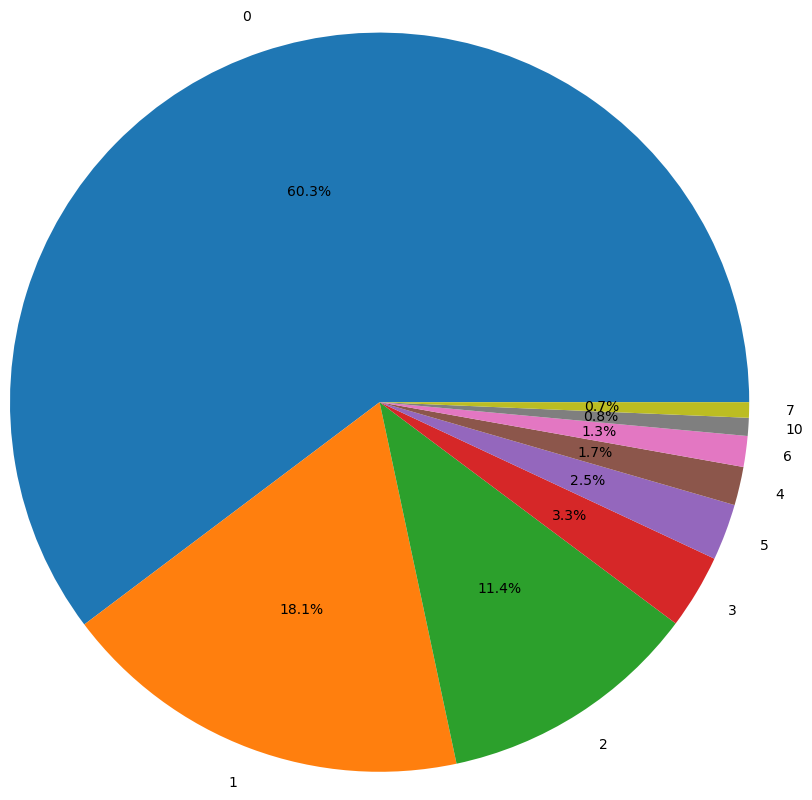

In [56]:
plt.pie(x= sorted(train.groupby('Family')['Survived'].count().tolist(), reverse=True),
        labels = [0,1,2,3,5,4,6,10,7],
       autopct='%0.1f%%', radius=2.5)
plt.show()

<AxesSubplot:xlabel='Family', ylabel='Survived'>

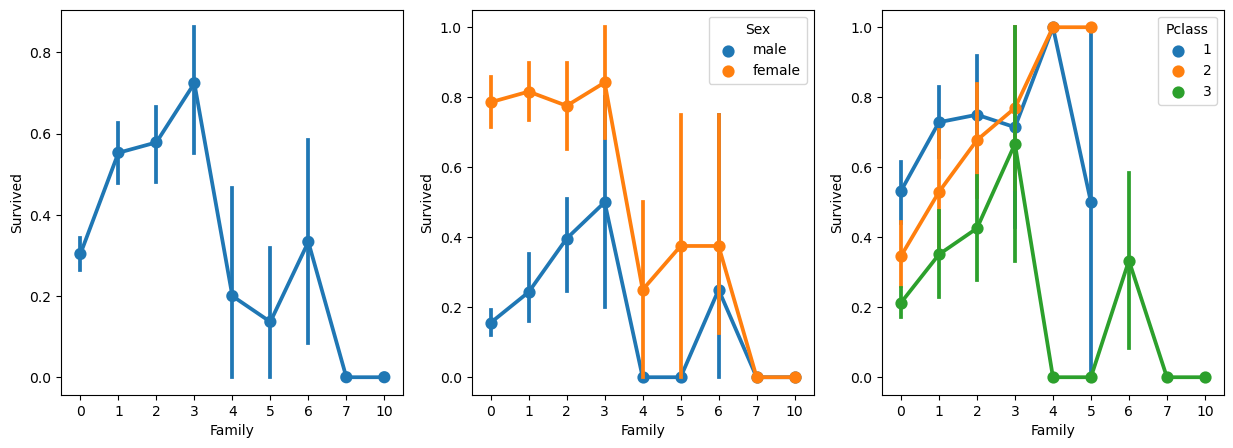

In [57]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x='Family', y= 'Survived', data=train, ax=ax[0])
sns.pointplot(x='Family', y= 'Survived', hue='Sex', data=train, ax=ax[1])
sns.pointplot(x='Family', y= 'Survived', hue='Pclass', data=train, ax=ax[2])

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

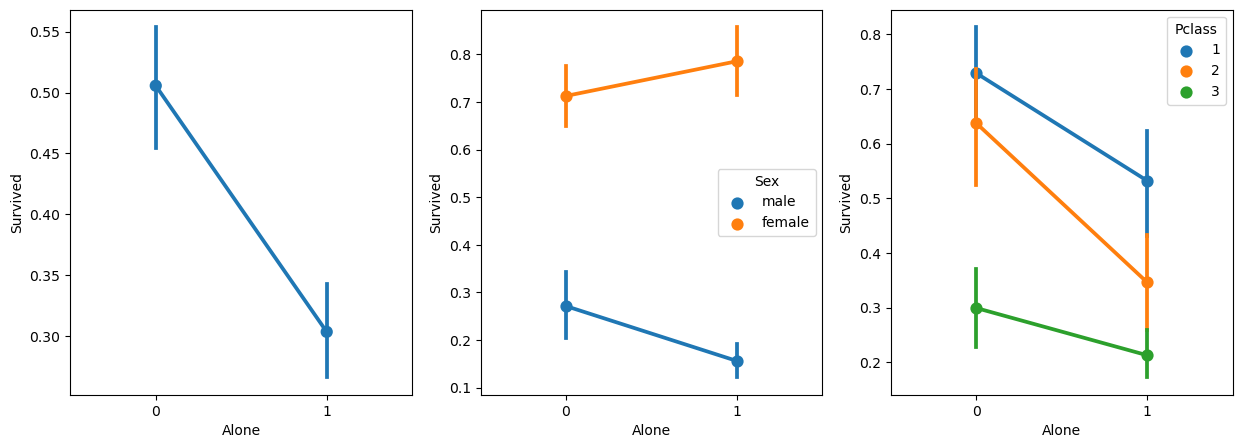

In [58]:
f,ax = plt.subplots(1, 3, figsize = (15,5))
sns.pointplot(x='Alone', y= 'Survived', data=train, ax=ax[0])
sns.pointplot(x='Alone', y= 'Survived', hue='Sex', data=train, ax=ax[1])
sns.pointplot(x='Alone', y= 'Survived', hue='Pclass', data=train, ax=ax[2])

#### Observation

### Fare

In [59]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Visualize train data

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

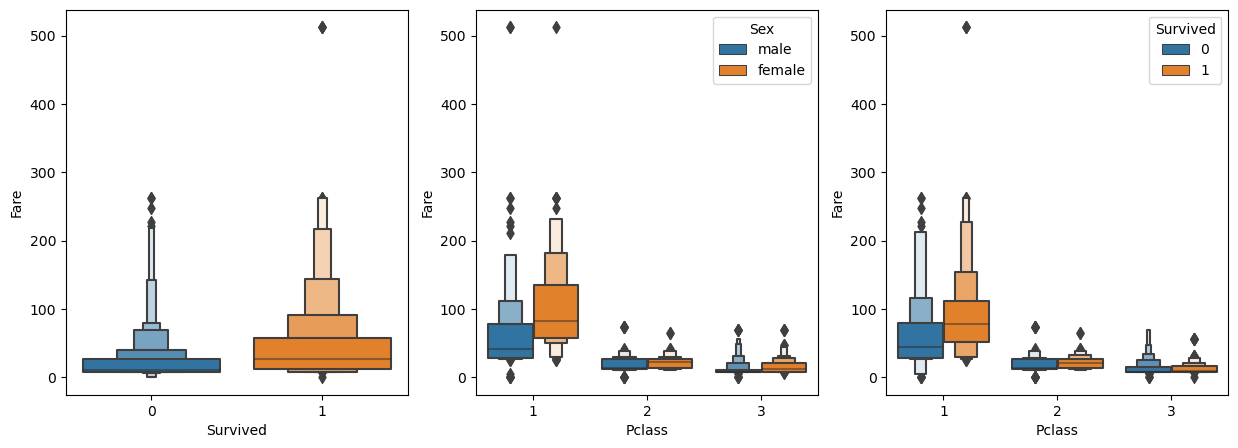

In [60]:
f,ax = plt.subplots(1,3, figsize=(15,5))
sns.boxenplot(data=train, y='Fare', x='Survived', ax=ax[0])
sns.boxenplot(data=train, y='Fare', x='Pclass',hue= 'Sex', ax=ax[1])
sns.boxenplot(data=train, y='Fare', x='Pclass',hue= 'Survived', ax=ax[2])

#### Converting to Categorical

In [61]:
train['FareGrp'] = pd.cut(train['Fare'], bins=[0,10,20,30,60,100,250,520], labels=[10,20,30,60,100,250,520], include_lowest=True)
merged_test['FareGrp'] = pd.cut(merged_test['Fare'], bins=[0,10,20,30,60,100,250,520], labels=[10,20,30,60,100,250,520], include_lowest=True)

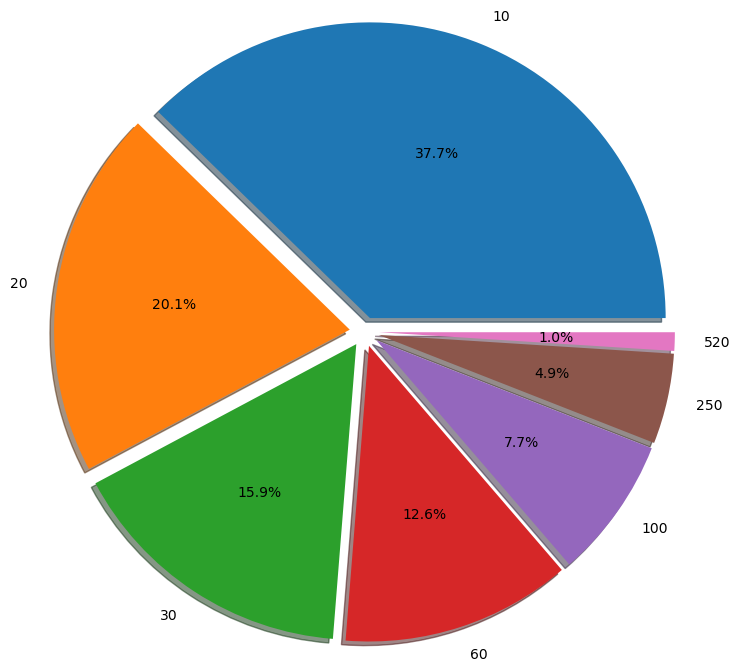

In [62]:
plt.pie(x= sorted(train.groupby('FareGrp')['Survived'].count().tolist(), reverse=True),
        explode=[0.1]*7,
        labels=[10,20,30,60,100,250,520],
        autopct = '%0.1f%%',shadow=True, radius=2)
plt.show()

### Embarked

In [63]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [64]:
len(train)

891

In [65]:
# Filling nan value with most frequent value
train.Embarked.fillna('S', axis=0, inplace=True)

In [66]:
merged_test['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [67]:
len(merged_test)

418

#### Visualize train data

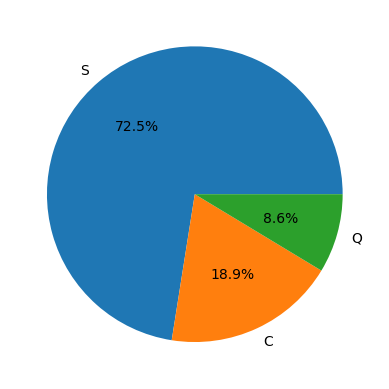

In [68]:
plt.pie(x= sorted(train.groupby('Embarked')['Survived'].count().tolist(), reverse=True),
        labels=['S','C','Q'],
        autopct = '%0.1f%%')
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

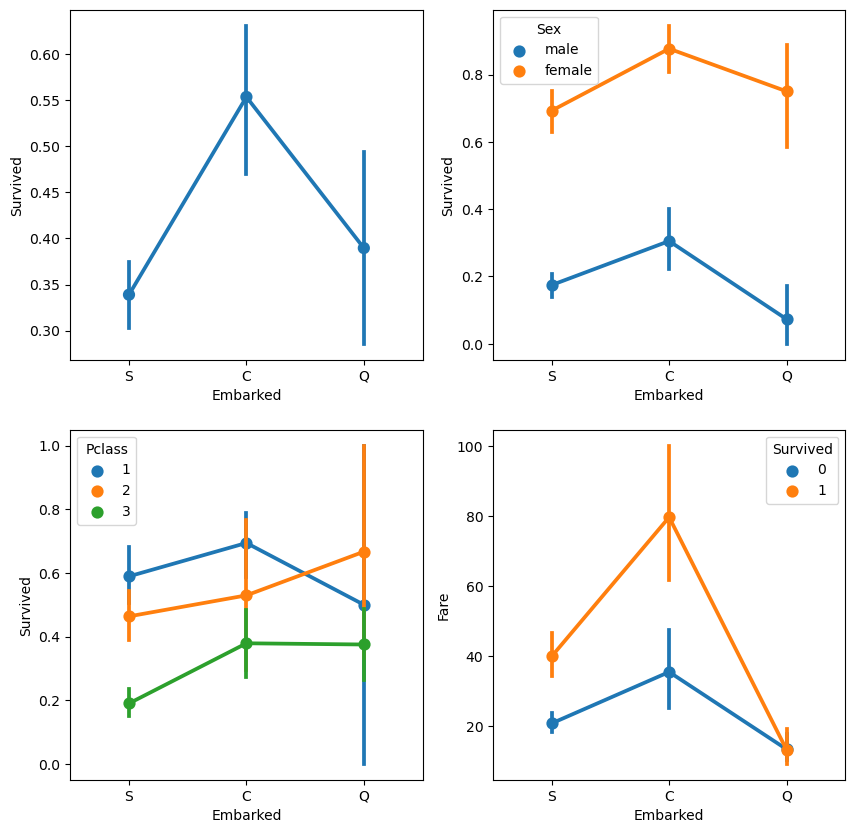

In [69]:
f,ax = plt.subplots(2,2, figsize=(10,10))
sns.pointplot(x='Embarked', y='Survived', data=train, ax=ax[0][0])
sns.pointplot(x='Embarked', y='Survived', hue='Sex', data=train, ax=ax[0][1])
sns.pointplot(x='Embarked', y='Survived', hue='Pclass', data=train, ax=ax[1][0])
sns.pointplot(x='Embarked', y='Fare', hue='Survived', data=train, ax=ax[1][1])

pd.crosstab([train.Embarked, train.Sex], [train.Survived], margins=True)

## Data Pre-processing

In [70]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGrp,Family,Alone,FareGrp
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,3,1,0,10
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,4,1,0,100
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,3,0,1,10
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,4,1,0,60
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,4,0,1,10
5,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,Q,Mr,4,0,1,10
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,5,0,1,60
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,1,4,0,30
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,3,2,0,20
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,2,1,0,60


In [71]:
feature_list = ['Embarked', 'Fare', 'Sex', 'Title', 'Alone', 'Age', 'Pclass', 'Family']

In [72]:
X_train = train[feature_list]
y_train = train['Survived'].values

X_test = merged_test[feature_list]
y_test = merged_test['Survived'].values

In [73]:
X_train.head()

,Embarked,Fare,Sex,Title,Alone,Age,Pclass,Family
0,S,7.2500,male,Mr,0,22.0,3,1
1,C,71.2833,female,Mrs,0,38.0,1,1
2,S,7.9250,female,Miss,1,26.0,3,0
3,S,53.1000,female,Mrs,0,35.0,1,1
4,S,8.0500,male,Mr,1,35.0,3,0


In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'A' column
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train['Embarked'] = le.fit_transform(X_train['Embarked'])
X_train['Title'] = le.fit_transform(X_train['Title'])

X_train.head()

C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1126681807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = le.fit_transform(X_train['Sex'])
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1126681807.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Embarked'] = le.fit_transform(X_train['Embarked'])
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1126681807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,Embarked,Fare,Sex,Title,Alone,Age,Pclass,Family
0,2,7.2500,1,2,0,22.0,3,1
1,0,71.2833,0,3,0,38.0,1,1
2,2,7.9250,0,1,1,26.0,3,0
3,2,53.1000,0,3,0,35.0,1,1
4,2,8.0500,1,2,1,35.0,3,0


In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'A' column
X_test['Sex'] = le.fit_transform(X_test['Sex'])
X_test['Embarked'] = le.fit_transform(X_test['Embarked'])
X_test['Title'] = le.fit_transform(X_test['Title'])

X_test.head()

C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1618350901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = le.fit_transform(X_test['Sex'])
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1618350901.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Embarked'] = le.fit_transform(X_test['Embarked'])
C:\Users\AHMAD\AppData\Local\Temp\ipykernel_27500\1618350901.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Embarked,Fare,Sex,Title,Alone,Age,Pclass,Family
0,1,7.8292,1,2,1,34.5,3,0
1,2,7.0000,0,3,0,47.0,3,1
2,1,9.6875,1,2,1,62.0,2,0
3,2,8.6625,1,2,1,27.0,3,0
4,2,12.2875,0,3,0,22.0,3,2


<AxesSubplot:>

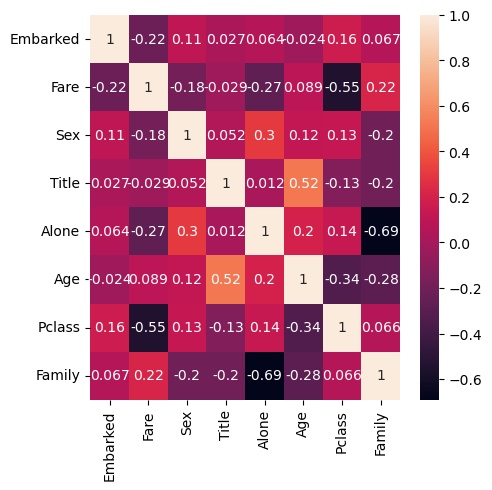

In [76]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(data=X_train.corr(), annot=True)

In [77]:
X_test.isna().sum()

Embarked    0
Fare        1
Sex         0
Title       0
Alone       0
Age         0
Pclass      0
Family      0
dtype: int64

In [78]:
X_train.isna().sum()

Embarked    0
Fare        0
Sex         0
Title       0
Alone       0
Age         0
Pclass      0
Family      0
dtype: int64

In [79]:
X_test.loc[X_test['Fare'].isna(),'Fare'] = X_test['Fare'].mean()

In [80]:
# Convert to array type
X_train = X_train.values    # we can use np.asarray(X_train)
X_test = X_test.values
# y_train = values.values
# y_test = y_test.values

In [81]:
type(X_train)

numpy.ndarray

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
X_train[:5, :2]

array([[ 0.58595414, -0.50244517],
       [-1.9423032 ,  0.78684529],
       [ 0.58595414, -0.48885426],
       [ 0.58595414,  0.42073024],
       [ 0.58595414, -0.48633742]])

In [84]:
X_train.shape, X_test.shape

((891, 8), (418, 8))

In [85]:
X_test

array([[-0.67817453, -0.49078316,  0.73769513, ...,  0.35091412,
         0.82737724, -0.56097483],
       [ 0.58595414, -0.50747884, -1.35557354, ...,  1.29259973,
         0.82737724,  0.05915988],
       [-0.67817453, -0.45336687,  0.73769513, ...,  2.42262246,
        -0.36936484, -0.56097483],
       ...,
       [ 0.58595414, -0.50244517,  0.73769513, ...,  0.65225352,
         0.82737724, -0.56097483],
       [ 0.58595414, -0.48633742,  0.73769513, ...,  0.162577  ,
         0.82737724, -0.56097483],
       [-1.9423032 , -0.19824428,  0.73769513, ..., -1.72079422,
         0.82737724,  0.67929458]])

## Model Implementation

### 1. Linear Logistic Model

In [86]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1)

model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

print(classification_report(y_test, y_pred1))
accuracy_score(y_pred1, y_test)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       261
           1       0.86      0.83      0.85       157

    accuracy                           0.89       418
   macro avg       0.88      0.88      0.88       418
weighted avg       0.89      0.89      0.89       418



0.8875598086124402

### 2. SVM Model

In [87]:
from sklearn.svm import SVC

model2 = SVC(kernel = 'rbf', random_state=1)

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))
accuracy_score(y_pred2, y_test)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       261
           1       0.93      0.95      0.94       157

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



0.9545454545454546

### 3. KNN Model

In [88]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=5)

model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

print(classification_report(y_test, y_pred3))
accuracy_score(y_pred3, y_test)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       261
           1       0.84      0.90      0.87       157

    accuracy                           0.90       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.90      0.90       418



C:\Users\AHMAD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8971291866028708

### 4. Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier(max_depth=2, random_state=1)

model4.fit(X_train, y_train)

y_pred4 = model4.predict(X_test)

print(classification_report(y_test, y_pred4))
accuracy_score(y_pred4, y_test)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       261
           1       0.95      0.61      0.74       157

    accuracy                           0.84       418
   macro avg       0.88      0.80      0.81       418
weighted avg       0.86      0.84      0.83       418



0.8421052631578947

### 5. Random Forest Model

In [90]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)

model5.fit(X_train, y_train)

y_pred5 = model5.predict(X_test)

print(classification_report(y_test, y_pred5))
accuracy_score(y_pred5, y_test)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       261
           1       0.92      0.89      0.90       157

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



0.9282296650717703

### 6. Naive Bayes

In [91]:
from sklearn.naive_bayes import BernoulliNB

model6 = BernoulliNB()

model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

print(classification_report(y_test, y_pred6))
accuracy_score(y_pred6, y_test)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       261
           1       0.77      0.86      0.81       157

    accuracy                           0.85       418
   macro avg       0.84      0.85      0.85       418
weighted avg       0.86      0.85      0.85       418



0.8516746411483254

### 7. Neurone Network Model

In [92]:
!pip install tensorflow

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.2
    Uninstalling protobuf-4.23.2:
      Successfully uninstalled protobuf-4.23.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\AHMAD\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
model7 = Sequential()
model7.add(Dense(15, input_dim=8, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=0)

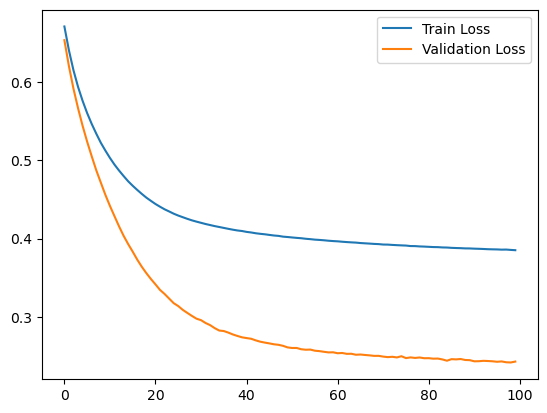

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train Loss', 'Validation Loss'])

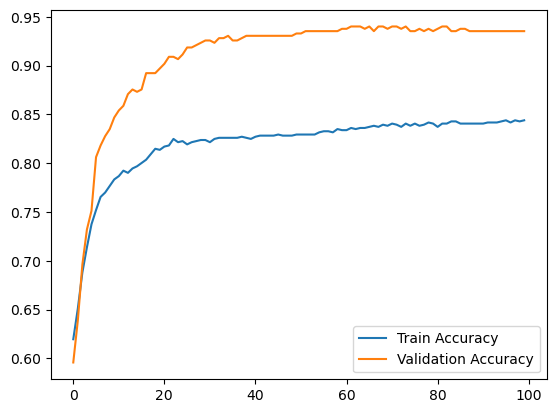

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train Accuracy', 'Validation Accuracy'])

In [97]:
y_pred7 = model7.predict(X_test)

for i in range(len(y_pred7)):
    if y_pred7[i] > 0.5:
        y_pred7[i] = 1
    else:
        y_pred7[i] = 0

print(classification_report(y_test, y_pred7))
accuracy_score(y_pred7, y_test)

14/14 [==============================] - 0s 650us/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       261
           1       0.92      0.90      0.91       157

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



0.9354066985645934